# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key


for city in cities:
    # Weather check.
    query_url = f"{url}appid={api_key}&q={city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    if 'weather' in weather_json.keys():
        print(f"Processing: {city} | weather info: {weather_json.get('weather')}")
    else:
        print(f"Processing: {city} | None")

Processing: port keats | weather info: [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}]
Processing: sinnamary | weather info: [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}]
Processing: grand river south east | None
Processing: watertown | weather info: [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]
Processing: kasongo-lunda | weather info: [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}]
Processing: mabaruma | weather info: [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}]
Processing: albany | weather info: [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}]
Processing: port-gentil | weather info: [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}]
Processing: qaqortoq | weather info: [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}]
Processing: ilulissat | weather info: [{

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
city_data = pd.read_csv(output_data_file)
city_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
city_data[['Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 
           'Wind Speed','Date']].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.665146,20.675529,64.970785,67.671533,49.405109,8.672682,1.558379e+09
std,33.623560,90.307948,18.704318,23.697626,36.914201,5.865974,7.820486e+01
min,-54.810000,-173.230000,4.920000,4.000000,0.000000,0.540000,1.558378e+09
25%,-6.267500,-61.015000,53.970000,52.000000,13.750000,4.680000,1.558379e+09
50%,21.390000,21.240000,64.990000,71.000000,46.500000,7.010000,1.558379e+09
75%,47.887500,102.937500,80.600000,86.000000,81.000000,11.410000,1.558379e+09
max,78.220000,179.320000,104.100000,290.000000,100.000000,46.080000,1.558379e+09


In [34]:
#  Get the indices of cities that have humidity over 100%.
filtered_cities_indxs = city_data[city_data['Humidity'] > 100].index
filtered_cities_indxs

Int64Index([129], dtype='int64')

In [68]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.drop(city_data.index[filtered_cities_indxs], inplace=False)
clean_city_data.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [69]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("./clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

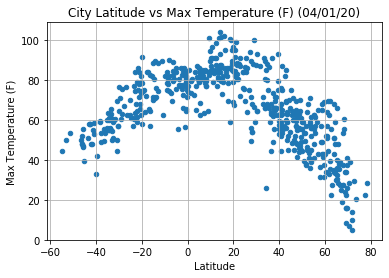

In [59]:
ax = clean_city_data.plot.scatter(x='Lat',
                      y='Max Temp')
ax.set_title("City Latitude vs Max Temperature (F) (04/01/20)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.grid()

In [67]:
#Analysis:
#This scatterplot shows the relationship of a city's Latitude and its temperature

## Latitude vs. Humidity Plot

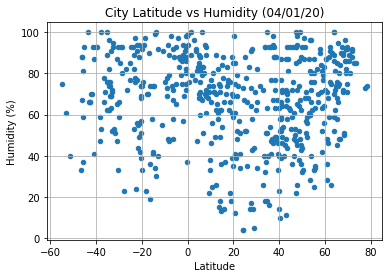

In [60]:
ax = clean_city_data.plot.scatter(x='Lat',
                      y='Humidity')
ax.set_title("City Latitude vs Humidity (04/01/20)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.grid()

In [ ]:
#Analysis:
#This scatterplot shows the relationship between city location (via Latitude) and its amount of Humidity.


## Latitude vs. Cloudiness Plot

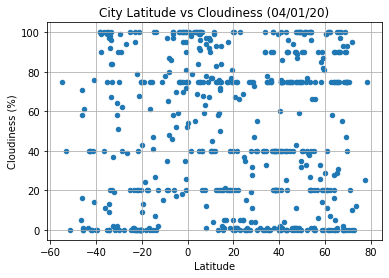

In [61]:
ax = clean_city_data.plot.scatter(x='Lat',
                      y='Cloudiness')
ax.set_title("City Latitude vs Cloudiness (04/01/20)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.grid()

In [ ]:
#Analysis:
#This scatterplot shows the relationship between a city's location (measured by Latitude) and how dense the clouds are

## Latitude vs. Wind Speed Plot

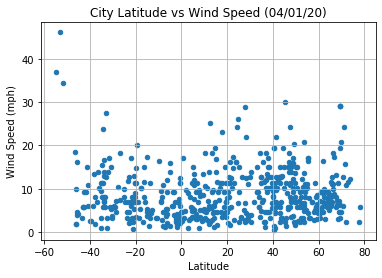

In [62]:
ax = clean_city_data.plot.scatter(x='Lat',
                      y='Wind Speed')
ax.set_title("City Latitude vs Wind Speed (04/01/20)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.grid()

In [ ]:
#Analysis:
#This scatterplot shows the relationship between a city's location (via Latitude) and how fast/strong the wind is (measured by mph)

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


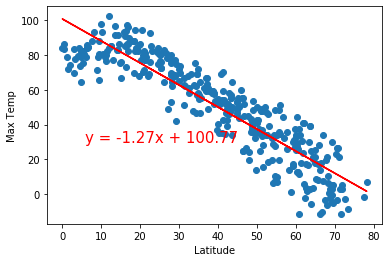

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


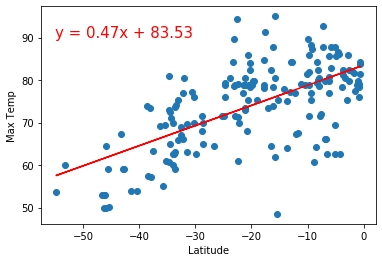

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


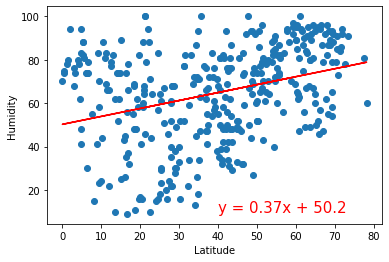

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


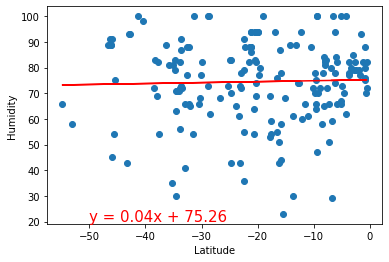

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


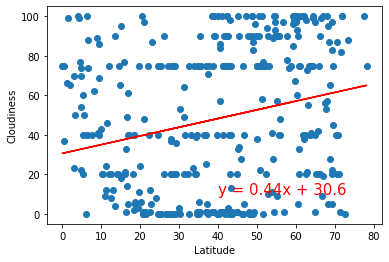

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


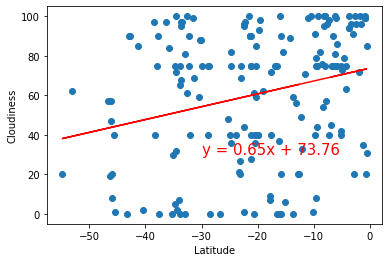

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


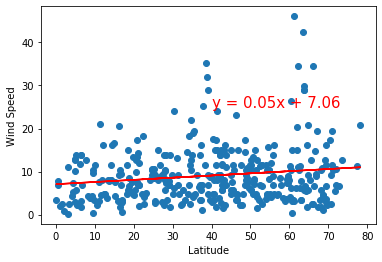

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


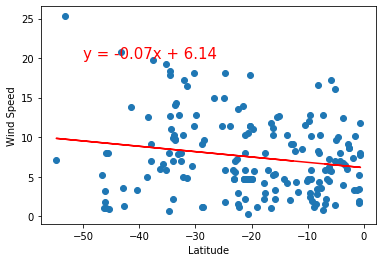